In [19]:
import os
import wfdb
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import biosppy
import pyhrv.tools as tools

In [20]:
def count_unique_records_plus(base_folder):
    unique_records = set()
    hrv_lengths = []
    ecg_lengths = []
    i=0
    for folder_name in os.listdir(base_folder):
        print(folder_name)
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    unique_records.add(record_name)
                    record_path = os.path.join(folder_path, record_name)

                    try:
                        
                        record = wfdb.rdsamp(record_path)
                        

                        # Extract the signals
                        signal, fs = record[0], record[1]['fs']
                        # print(fs)
                        # print(signal.shape)
                        ecg_lengths.append(len(signal[:,0]))
                        # x = list(range(signal.shape[0]))
                        # # Create traces (each trace corresponds to a curve)
                        # trace1 = go.Scatter(y=signal[:,0], mode='lines', name='Curve 1')
                        # trace2 = go.Scatter(y=signal[:,1], mode='lines', name='Curve 2')
                        

                        # # Create a figure and add the traces
                        # fig = go.Figure()

                        # fig.add_trace(trace1)
                        # fig.add_trace(trace2)
                        
                        # # Optionally, customize layout (e.g., titles)
                        # fig.update_layout(
                        #     title="Multiple Curves with Plotly",
                        #     xaxis_title="X Axis",
                        #     yaxis_title="Y Axis"
                        # )
                        # # Display the plot
                        # fig.show()

                    except Exception as e:
                        print(f"Error processing {record_path}: {e}")
                    record_per_file+=1
                    i+=1
                    if i > 5:
                        break

        print(f'There are {record_per_file} records in the folder {folder_name}.')
    return len(unique_records), np.unique(ecg_lengths)

# Path to your data folder
data_folder = 'ptb-diagnostic-ecg-database-1.0.0'

# Count the unique records
num_records,  ecg_min_length = count_unique_records_plus(data_folder)
print(f'Total number of unique records: {num_records}.\n\
ECG_LENGTH = {ecg_min_length}.')

CONTROLS
There are 0 records in the folder CONTROLS.
patient001
There are 3 records in the folder patient001.
patient002
There are 1 records in the folder patient002.
patient003
There are 1 records in the folder patient003.
patient004
There are 1 records in the folder patient004.
patient005
There are 1 records in the folder patient005.
patient006
There are 1 records in the folder patient006.
patient007
There are 1 records in the folder patient007.
patient008
There are 1 records in the folder patient008.
patient009
There are 1 records in the folder patient009.
patient010
There are 1 records in the folder patient010.
patient011
There are 1 records in the folder patient011.
patient012
There are 1 records in the folder patient012.
patient013
There are 1 records in the folder patient013.
patient014
There are 1 records in the folder patient014.
patient015
There are 1 records in the folder patient015.
patient016
There are 1 records in the folder patient016.
patient017
There are 1 records in t

In [21]:
[2**i  for i in range(16)]

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]

In [56]:
def count_unique_records_plus(base_folder):
    unique_records = set()
    hrv_lengths = []
    ecg_lengths = []
    i=0
    diagnosis = []
    normal_fs = 1000
    for folder_name in os.listdir(base_folder):
        # print(folder_name)
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    unique_records.add(record_name)
                    record_path = os.path.join(folder_path, record_name)

                    try:
                        
                        record = wfdb.rdsamp(record_path)
                        

                        # Extract the signals
                        signal, fs = record[0], record[1]['fs']
                        assert fs == normal_fs
                        x = signal[:,0]
                        
                        x, rpeaks = biosppy.signals.ecg.ecg(x, show=False,sampling_rate=fs)[1:3]

                        # Compute NNI
                        nni = tools.nn_intervals(rpeaks)
                        ecg_lengths.append(len(x))    
                        hrv_lengths.append(len(nni))
                        # print(record[1]['comments'][4][22:])
                        diagnosis.append(record[1]['comments'][4][22:]) 
                    except Exception as e:
                        print(f"Error processing {record_path}: {e}")
                    record_per_file+=1
                    i+=1
                    if i > 5:
                        break

        # print(f'There are {record_per_file} records in the folder {folder_name}.')
    return len(unique_records), np.array(ecg_lengths), np.array(hrv_lengths),diagnosis

# Path to your data folder
data_folder = 'ptb-diagnostic-ecg-database-1.0.0'

# Count the unique records
num_records,ecg_min_length, hrv_min_length,diagnosis  = count_unique_records_plus(data_folder)
print(f'Total number of unique records: {num_records}.')
# HRV_LENGTH = {hrv_min_length}.\n\
# ECG_LENGTH = {ecg_min_length}.')

Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial infarction
Myocardial

KeyboardInterrupt: 

In [ ]:
np.unique(diagnosis,return_counts=True)

In [ ]:

# folder_name = np.random.choice(os.listdir(base_folder))
# folder_path = os.path.join(base_folder, folder_name)
# file_name= np.random.choice([file_name.split('.hea')[0] for file_name in os.listdir(folder_path) if file_name.endswith('.hea')])
# record_path = os.path.join(folder_path, file_name)

In [24]:
# # Create a list of options
# options = ['Option 1', 'Option 2', 'Option 3', 'Option 4']

# # Create a dropdown widget
# dropdown = widgets.Dropdown(
#     options=options,
#     value=options[0],  # Default value
#     description='Choose:',
#     style={'description_width': 'initial'}  # To adjust the label width
# )

# # Display the dropdown
# display(dropdown)

# # Define a function to handle the dropdown selection
# def on_dropdown_change(change):
#     print(f"Selected: {change['new']}")

# # Attach the function to the dropdown
# dropdown.observe(on_dropdown_change, names='value')

Dropdown(description='Choose:', options=('Option 1', 'Option 2', 'Option 3', 'Option 4'), style=DescriptionSty…

Selected: Option 2
Selected: Option 4
Selected: Option 2
Selected: Option 3


In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [46]:
# Path to your data folder
data_folder = 'ptb-diagnostic-ecg-database-1.0.0'

files = list()
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):
        files.extend([os.path.join(folder_path,file_name.split('.hea')[0]) for file_name in os.listdir(folder_path) if file_name.endswith('.hea')])
    
def show_signal(file_index):
    file_path = files[file_index]
    record = wfdb.rdsamp(file_path)
    print(file_path,"  ",file_index)
    # Extract the signals
    signal, fs = record[0], record[1]['fs']
    x = signal[:,0]
    
    x, rpeaks = biosppy.signals.ecg.ecg(x, show=False, sampling_rate=fs)[1:3]

    # Compute NNI
    # nni = tools.nn_intervals(rpeaks)
    plt.plot(x)
    # median = np.quantile(x,q=0.9)
    # # peaks, _ = find_peaks(x,height=median, distance=30)
    # mov_avg =  moving_average(x,n=10)
    # peaks, _ = find_peaks(x,height=mov_avg+.1, distance=30)

    plt.plot(rpeaks, x[rpeaks], "x")
    plt.plot(np.zeros_like(x), "--", color="gray")
    # plt.plot(median*np.ones(x.size))
    # plt.plot(mov_avg)
    plt.show()
    print(f"ECG LENGTH = {len(x)}.\nHRV LENGTH = {len(rpeaks)}.")
    print(f"DIAGNOSIS: {record[1]['comments'][4][22:]}")


WEIRD CASE:
-SEEMS THERE IS AN OUTLIER
ptb-diagnostic-ecg-database-1.0.0\patient030\s0099lre    85
ptb-diagnostic-ecg-database-1.0.0\patient030\s0107lre    86
ptb-diagnostic-ecg-database-1.0.0\patient030\s0117lre    87
ptb-diagnostic-ecg-database-1.0.0\patient042\s0347lre    131
ptb-diagnostic-ecg-database-1.0.0\patient045\s0148lre    140
ptb-diagnostic-ecg-database-1.0.0\patient047\s0160lre    147
ptb-diagnostic-ecg-database-1.0.0\patient047\s0167lre    149 (SEVERAL)
ptb-diagnostic-ecg-database-1.0.0\patient048\s0277lre    153
ptb-diagnostic-ecg-database-1.0.0\patient049\s0173lre    154 (WEIRD)
ptb-diagnostic-ecg-database-1.0.0\patient050\s0174lre    158
ptb-diagnostic-ecg-database-1.0.0\patient051\s0179lre    162
ptb-diagnostic-ecg-database-1.0.0\patient055\s0194lre    172
ptb-diagnostic-ecg-database-1.0.0\patient063\s0214lre    180
ptb-diagnostic-ecg-database-1.0.0\patient067\s0283lre    191
ptb-diagnostic-ecg-database-1.0.0\patient073\s0238lre    203
ptb-diagnostic-ecg-database-1.0.0\patient078\s0259lre    224
ptb-diagnostic-ecg-database-1.0.0\patient079\s0263lre    229
ptb-diagnostic-ecg-database-1.0.0\patient084\s0281lre    247

-SEEMS THERE IS AN OUTLIER (NOT WORRYING)
ptb-diagnostic-ecg-database-1.0.0\patient036\s0116lre    110
ptb-diagnostic-ecg-database-1.0.0\patient036\s0126lre    111
ptb-diagnostic-ecg-database-1.0.0\patient084\s0289lre    249

-RR PEAK does not seem to work
ptb-diagnostic-ecg-database-1.0.0\patient010\s0036lre
ptb-diagnostic-ecg-database-1.0.0\patient010\s0042lre
ptb-diagnostic-ecg-database-1.0.0\patient053\s0191lre    167 (NEED TO ZOOM)
- VARYING AMPLITUDE
ptb-diagnostic-ecg-database-1.0.0\patient025\s0150lre    73
ptb-diagnostic-ecg-database-1.0.0\patient042\s0135lre    128
ptb-diagnostic-ecg-database-1.0.0\patient042\s0137lre    129
ptb-diagnostic-ecg-database-1.0.0\patient045\s0155lre    141
ptb-diagnostic-ecg-database-1.0.0\patient045\s0217lre    142
ptb-diagnostic-ecg-database-1.0.0\patient046\s0156lre    143
ptb-diagnostic-ecg-database-1.0.0\patient046\s0161lre    144
ptb-diagnostic-ecg-database-1.0.0\patient046\s0168lre    145
ptb-diagnostic-ecg-database-1.0.0\patient046\s0184lre    146
ptb-diagnostic-ecg-database-1.0.0\patient047\s0163lre    148
ptb-diagnostic-ecg-database-1.0.0\patient048\s0171lre    150
ptb-diagnostic-ecg-database-1.0.0\patient048\s0180lre    152
ptb-diagnostic-ecg-database-1.0.0\patient050\s0185lre    160 (NEED TO ZOOM)
ptb-diagnostic-ecg-database-1.0.0\patient083\s0272lre    244

COULD CUT THE START
ptb-diagnostic-ecg-database-1.0.0\patient044\s0146lre    137
ptb-diagnostic-ecg-database-1.0.0\patient054\s0192lre    168

COULD CUT THE END
ptb-diagnostic-ecg-database-1.0.0\patient023\s0103lre
ptb-diagnostic-ecg-database-1.0.0\patient044\s0159lre    138
ptb-diagnostic-ecg-database-1.0.0\patient051\s0213lre    165
ptb-diagnostic-ecg-database-1.0.0\patient075\s0327lre    214
ptb-diagnostic-ecg-database-1.0.0\patient084\s0288lre    248

COULD CUT THE START AND THE END
ptb-diagnostic-ecg-database-1.0.0\patient050\s0215lre    161

269

In [47]:
interact(show_signal, file_index=widgets.IntSlider(min=0, max=len(files), step=1, value=0));

interactive(children=(IntSlider(value=10, description='file_index', max=549), Output()), _dom_classes=('widget…

In [53]:
file_name = files[0]
record = wfdb.rdsamp(file_name )
record[1]['comments'][4][22:]

'Myocardial infarction'

In [ ]:
def count_unique_records_plus(base_folder):
    unique_records = set()
    hrv_lengths = []
    ecg_lengths = []
    i=0
    diagnosis = []
    normal_fs = 1000
    for folder_name in os.listdir(base_folder):
        # print(folder_name)
        folder_path = os.path.join(base_folder, folder_name)
        record_per_file = 0
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    unique_records.add(record_name)
                    record_path = os.path.join(folder_path, record_name)

                    try:
                        
                        record = wfdb.rdsamp(record_path)
                        

                        # Extract the signals
                        signal, fs = record[0], record[1]['fs']
                        assert fs == normal_fs
                        x = signal[:,0]
                        
                        x, rpeaks = biosppy.signals.ecg.ecg(x, show=False,sampling_rate=fs)[1:3]

                        # Compute NNI
                        nni = tools.nn_intervals(rpeaks)
                        ecg_lengths.append(len(x))    
                        hrv_lengths.append(len(nni))
                        # print(record[1]['comments'][4][22:])
                        diagnosis.append(record[1]['comments'][4][22:]) 
                    except Exception as e:
                        print(f"Error processing {record_path}: {e}")
                    record_per_file+=1
                    i+=1
                    if i > 5:
                        break

        # print(f'There are {record_per_file} records in the folder {folder_name}.')
    return len(unique_records), np.array(ecg_lengths), np.array(hrv_lengths),diagnosis

# Path to your data folder
data_folder = 'ptb-diagnostic-ecg-database-1.0.0'

# Count the unique records
num_records,ecg_min_length, hrv_min_length,diagnosis  = count_unique_records_plus(data_folder)
print(f'Total number of unique records: {num_records}.')
# HRV_LENGTH = {hrv_min_length}.\n\
# ECG_LENGTH = {ecg_min_length}.')

In [61]:
def first_try_ecg_hrv_dataset(base_folder, ecg_example_length = 50_000):
    diagnosis = []
    hrv_lengths = []
    normal_fs = 1000
    ecgs = []
    for folder_name in os.listdir(base_folder):
        # print(folder_name)
        folder_path = os.path.join(base_folder, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if file_name.endswith('.hea'):
                    record_name = file_name.split('.hea')[0]
                    record_path = os.path.join(folder_path, record_name)

                    try:
                        
                        record = wfdb.rdsamp(record_path)
                        

                        # Extract the signals
                        signal, fs = record[0], record[1]['fs']
                        assert fs == normal_fs
                        x = signal[10:-10,0]
                        if x.size >= ecg_example_length:
                            start_index = 0
                            while start_index + ecg_example_length < x.size:
                                sub_x = x[start_index : (start_index + ecg_example_length)]
                                filtered_sub_x, rpeaks = biosppy.signals.ecg.ecg(sub_x, show=False, sampling_rate=fs)[1:3]

                                # Compute NNI
                                nni = tools.nn_intervals(rpeaks)
                                
                                hrv_lengths.append(len(nni))
                                print(len(nni))
                                ecgs.append(filtered_sub_x)
                                diagnosis.append(record[1]['comments'][4][22:]) 

                                start_index += ecg_example_length // 2
                    except Exception as e:
                        print(f"Error processing {record_path}: {e}")


        # print(f'There are {record_per_file} records in the folder {folder_name}.')
    return np.array(ecgs), np.array(hrv_lengths), diagnosis


# Path to your data folder
data_folder = 'ptb-diagnostic-ecg-database-1.0.0'

# Count the unique records
ecgs, hrv_lengths, diagnosis  = first_try_ecg_hrv_dataset(data_folder)
print(f'Total number of unique records: {num_records}.')

70
70
70
66
65
65
64
64
63
58
57
58
67
67
67
66
66
66
78
80
80
77
78
77
84
84
84
75
74
75
54
52
52
72
74
76
66
66
65
62
63
63
60
60
60
58
56
57
56
55
56
41
43
44
48
48
48
51
52
52
48
48
48
73
72
72
64
64
64
70
70
70
73
74
74
64
64
64
72
72
72
42
41
42
51
51
51
69
69
70
68
68
67
72
72
72
69
69
68
61
61
61
65
65
65
93
94
94
67
67
68
54
54
55
48
48
47
60
59
58
45
46
46
77
76
76
50
47
48
65
66
65
51
51
51
72
71
70
64
64
63
56
56
57
73
72
71
70
70
69
60
61
60
53
52
51
41
40
41
56
56
58
60
60
60
76
75
73
74
74
76
53
52
53
53
52
53
56
56
54
54
54
54
54
54
45
45
43
44
44
45
52
51
51
52
51
51
53
52
52
63
62
63
60
61
61
47
44
48
57
57
57
61
60
60
64
64
63
83
82
82
92
92
93
69
70
70
48
47
48
42
43
45
40
40
40
78
80
80
69
69
69
70
68
68
67
67
65
45
45
45
45
45
46
59
61
61
77
77
77
70
71
72
73
72
73
63
62
62
82
82
83
72
73
73
62
63
63
68
67
68
64
64
64
52
51
51
50
50
49
47
47
48
99
99
100
75
74
74
68
69
70
63
63
63
73
73
74
69
70
71
77
76
77
71
72
71
60
59
61
60
60
60
59
59
59
58
58
60
56
55
56
59


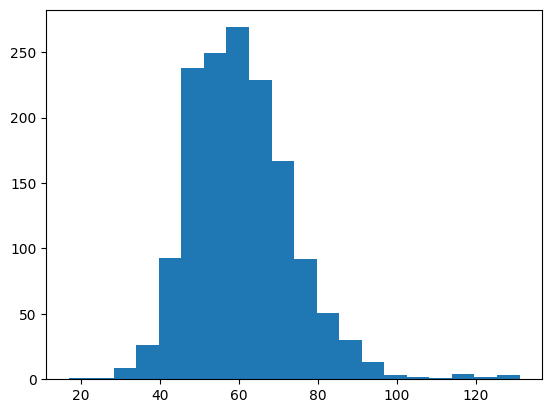

In [69]:
plt.hist(hrv_lengths,bins=20);

In [48]:
# import ipywidgets as widgets
# from IPython.display import display

# # Create a slider widget
# slider = widgets.IntSlider(
#     value=10,  # Default value
#     min=0,     # Minimum value
#     max=100,   # Maximum value
#     step=1,    # Step size
#     description='Value:',
#     style={'description_width': 'initial'}  # To adjust the label width
# )

# # Display the slider
# display(slider)

# # Define a function that will use the slider's value
# def on_value_change(change):
#     print(f"Slider value: {change['new']}")

# # Attach the function to the slider
# slider.observe(on_value_change, names='value' )

IntSlider(value=10, description='Value:', style=SliderStyle(description_width='initial'))

Slider value: 11
Slider value: 12
Slider value: 13
Slider value: 14
Slider value: 17
Slider value: 26
Slider value: 36
Slider value: 38
Slider value: 39
Slider value: 40
Slider value: 39
Slider value: 38
Slider value: 37
Slider value: 36
Slider value: 34
Slider value: 32
Slider value: 31
Slider value: 29
Slider value: 28
Slider value: 27
